May: **Research Questions 2.2** (Ideal and Real)

# Which of the three upwelling mechanisms (time dependence, advection, convergence of isobaths, coastal trapped wave) provides the strongest contribution to upwelling in Mackenzie Canyon?

At what depths does maximum upwelling occur?

(48 hrs) 46 min 

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions

import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime 

In [2]:
def get_max_depth_upwelled(dirname, fname, meshmaskname, dep_ind, time_s, time_f, vosaline_ref_profile):

    start_time = datetime.now() 

    y_end = None
    vosaline, sozotaux, deptht, tmask = upwelling_functions.get_vars_salt(dirname, fname, meshmaskname, 
                                                                            dep_ind, time_s, time_f, y_end)
    max_vosaline = np.full([vosaline.shape[0]], np.nan)
    for t in range(vosaline.shape[0]):
        max_vosaline[t] = np.nanmax(vosaline[t, :, :])
    depth_ind_hourly = upwelling_functions.get_daily_depth_ind(max_vosaline, vosaline_ref_profile)
    depth_m_hourly, depth_upwelled = upwelling_functions.get_daily_depth_m(deptht, dep_ind, depth_ind_hourly, tmask)

    time_elapsed = datetime.now() - start_time 
    print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
        
    return depth_m_hourly, depth_upwelled, sozotaux, deptht, tmask

In [3]:
def plot_axes(n, depth_upwelled, tmask, deptht, dep_ind, time_s, time_f):
    xs = np.arange(tmask.shape[-1])
    ys = np.arange(tmask.shape[-2])
    ts = np.arange(time_s+1, time_f+1)
    
    cmap = LinearSegmentedColormap.from_list('mycmap', ['wheat', 'white'])

    p = axes[n, 0].pcolormesh(xs, ys, tmask, cmap=cmap)
    axes[n, 0].set_xlim([0, xs[-1]])
    axes[n, 0].set_ylim([0, ys[-1]])
    axes[n, 0].set_title('depth ' + str(int(round(int(deptht[dep_ind])))), fontsize=20)
    axes[n, 0].set_aspect(aspect='equal')
    
    axes[n, 1].plot(ts, depth_upwelled, c='steelblue', lw=3)
    axes[n, 1].xaxis.set_ticks(np.arange(time_s+1, time_f+1, 24))
    axes[n, 1].set_ylim([-20, 350])
    axes[n, 1].set_xlim([0, ts[-1]])
    
    return

# Constants

In [4]:
vosaline_ref = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][:]
vosaline_ref_profile = vosaline_ref[0, :, 0, 0]

fname = '1_MCKNZ_1h_20170101_201701*'
meshmaskname = '1_mesh_mask.nc'

time_s = 0 # python count
time_f = 10*24 # python count
dep_inds = [1, 9, 16]

# Ideal

In [5]:
kind = 'ideal'
case = 'base'
dirname = '/ocean/imachuca/Canyons/results_mackenzie/extended_domain/'+kind+'_'+case+'/'

Time elapsed (hh:mm:ss.ms) 0:00:12.100502
Time elapsed (hh:mm:ss.ms) 0:00:12.131317
Time elapsed (hh:mm:ss.ms) 0:00:12.352963


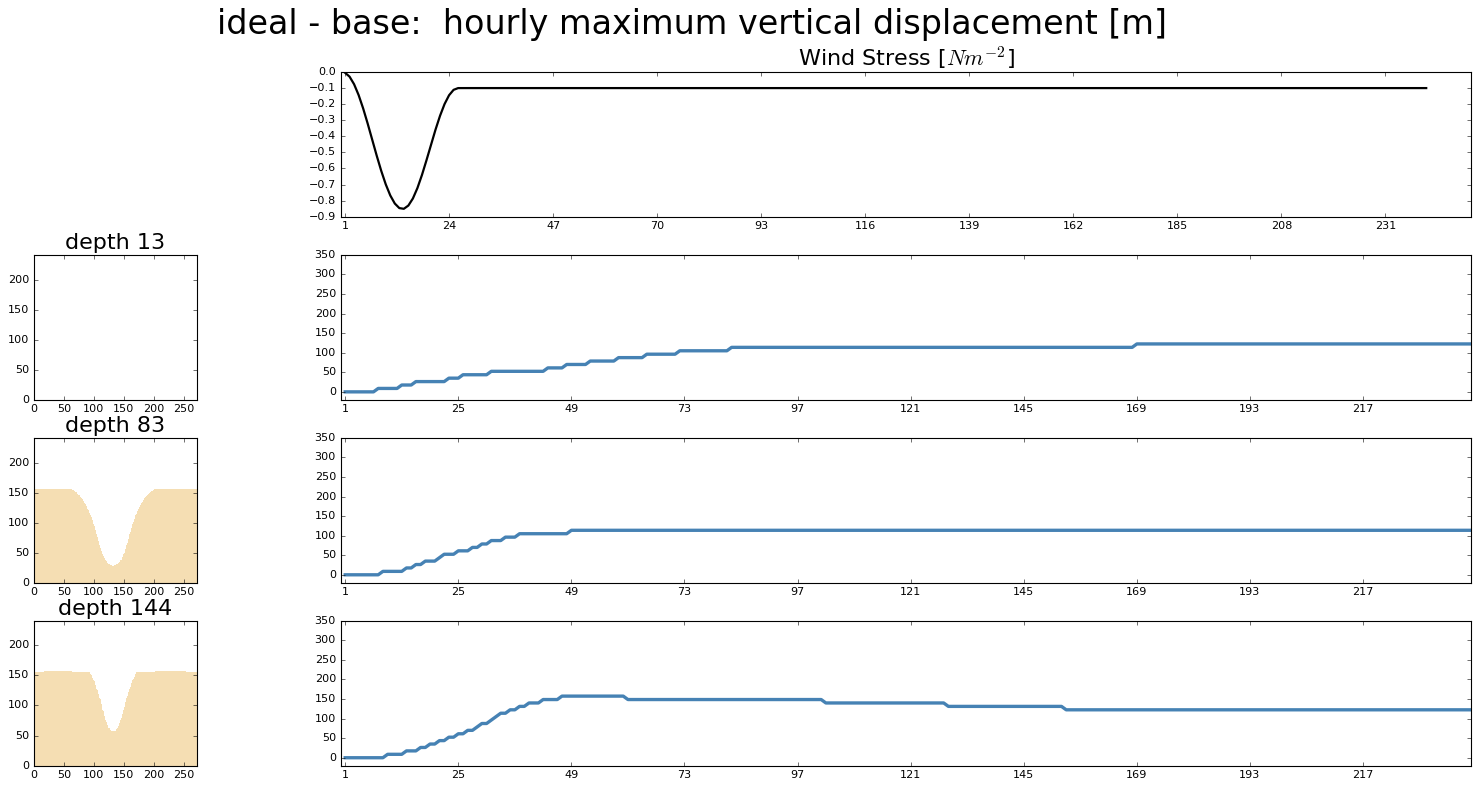

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10), gridspec_kw={"width_ratios":[1, 3]})
fig.tight_layout(w_pad=0.5, h_pad=2)

for n, dep_ind in zip(np.arange(1, len(dep_inds)+1), dep_inds):
    depth_m_hourly, depth_upwelled, sozotaux, deptht, tmask = get_max_depth_upwelled(dirname, fname, meshmaskname, dep_ind, time_s, time_f, vosaline_ref_profile)
    plot_axes(n, depth_upwelled, tmask, deptht, dep_ind, time_s, time_f)

ts = np.arange(time_s+1, time_f+1)
axes[0, 0].remove()
axes[0, 1].plot(ts, sozotaux, c='k', lw=2)
axes[0, 1].xaxis.set_ticks(np.arange(time_s+1, time_f+1, 23))
axes[0, 1].set_title('Wind Stress [$Nm^{-2}$]', fontsize=20)
plt.subplots_adjust(top=0.90)
fig.suptitle(kind+' - '+case+': '+' hourly maximum vertical displacement [m]', fontsize=30)

#fig.savefig('../writing_images/displaced_time_series_'+kind+'_'+case+'_hrs'+str(time_f - time_s)+'.png', dpi=100, bbox_inches='tight')

# Real

In [7]:
kind = 'real'
case = 'base'
dirname = '/ocean/imachuca/Canyons/results_mackenzie/extended_domain/'+kind+'_'+case+'/'

Time elapsed (hh:mm:ss.ms) 0:00:12.472696


ValueError: too many values to unpack (expected 4)

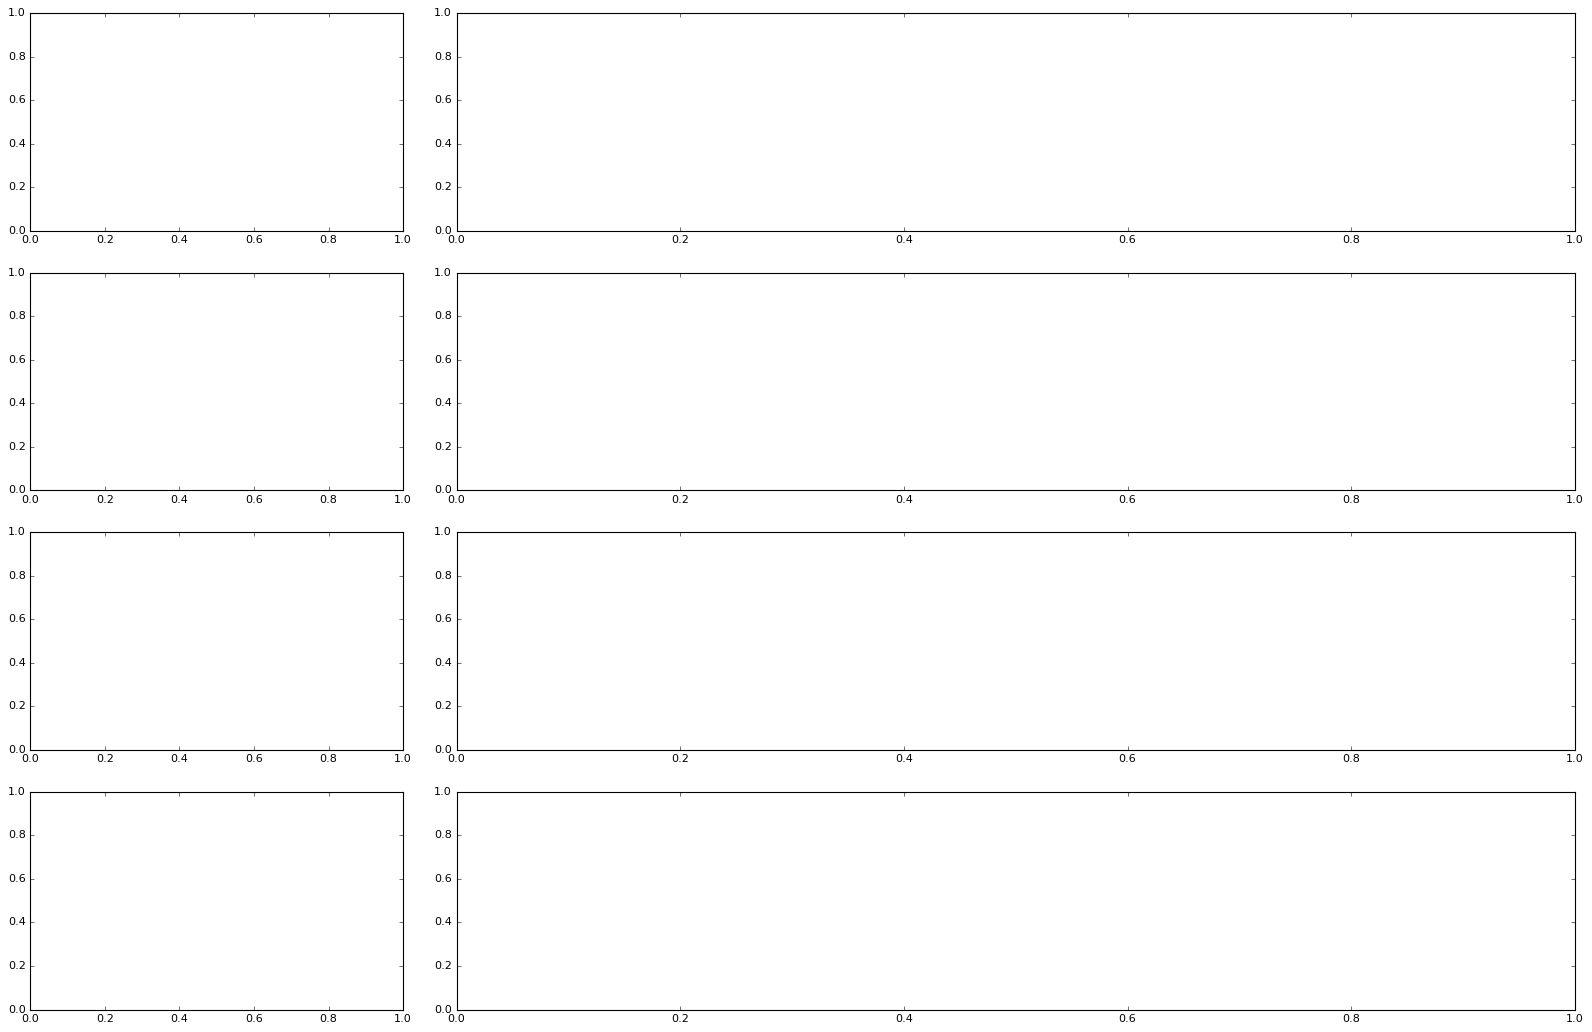

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(20, 13), gridspec_kw={"width_ratios":[1, 3]})
fig.tight_layout(w_pad=2, h_pad=2)

for n, dep_ind in zip(np.arange(1, len(dep_inds)+1), dep_inds):
    depth_m_hourly, sozotaux, deptht, tmask = get_max_depth_upwelled(dirname, fname, meshmaskname, dep_ind, time_s, time_f, vosaline_ref_profile)
    plot_axes(n, depth_m_hourly, tmask, deptht, dep_ind, time_s, time_f)

ts = np.arange(time_s+1, time_f+1)
axes[0, 0].remove()
axes[0, 1].plot(ts, sozotaux, c='k', lw=2)
axes[0, 1].xaxis.set_ticks(np.arange(time_s+1, time_f+1, 23))
axes[0, 1].set_title('Wind Stress [$Nm^{-2}$]', fontsize=20)
plt.subplots_adjust(top=0.92)
fig.suptitle(kind+' - '+case+': '+'maximum vertical displacement [m] at depth slices', fontsize=30)

#fig.savefig('../writing_images/displaced_time_series_'+kind+'_'+case+'_hrs'+str(time_f - time_s)+'.png', dpi=100, bbox_inches='tight')